# Stock Price and Revenue Analysis for Tesla and GameStop

## Introduction
In this project, we analyze the historical stock prices and quarterly revenue data for Tesla and GameStop. By visualizing these data points, we can gain insights into the performance of these companies over time. This analysis utilizes Python libraries such as `yfinance`, `pandas`, `requests`, `BeautifulSoup`, and `plotly`.

## Data Retrieval
We will retrieve stock price data using the `yfinance` library, which provides an easy way to access financial data. Additionally, we will scrape revenue data from publicly available web pages using `requests` and `BeautifulSoup`.

In [90]:
# Importing necessary libraries
import yfinance as yf  # For fetching stock price data
import pandas as pd  # For data manipulation
import requests  # For making HTTP requests
from bs4 import BeautifulSoup  # For parsing HTML
import plotly.graph_objects as go  # For creating interactive plots
from plotly.subplots import make_subplots  # For subplot functionality
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore", category=FutureWarning)


## Data Visualization
The following function creates graphs to visualize the stock prices and revenue data for both companies.

In [104]:
def make_graph(stock_data, revenue_data, stock):
    # Create a subplot with two rows for price and revenue
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"),
                        vertical_spacing=0.3)
    
    # Filter stock data up to a specific date
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    # Filter revenue data up to a specific date
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    # Add stock price trace to the first subplot
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True),
                              y=stock_data_specific.Close.astype("float"),
                              name="Share Price"), row=1, col=1)
    
    # Add revenue trace to the second subplot
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True),
                              y=revenue_data_specific.Revenue.astype("float"),
                              name="Revenue"), row=2, col=1)
    
    # Update x-axis titles for both plots
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    
    # Update y-axis titles for price and revenue
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    # Update layout settings for the figure
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    # Display the plot
    fig.show()


## Fetching Tesla Data
Let's retrieve the historical stock price data for Tesla (TSLA).

In [107]:
tesla = yf.Ticker('TSLA')  # Create a Ticker object for Tesla
tesla_data = tesla.history(period='max')  # Get historical stock data
tesla_data.reset_index(inplace=True)  # Reset index to make 'Date' a column

tesla_data.head()  # Display the first few rows of Tesla stock data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Fetching Tesla Revenue Data
Next, we will scrape Tesla's quarterly revenue data from the specified URL.

In [109]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text  # Get the HTML data from the URL
soup = BeautifulSoup(html_data, 'html.parser')  # Parse HTML using BeautifulSoup
tesla_revenue_all = pd.read_html(html_data)  # Read tables from HTML
tesla_revenue = tesla_revenue_all[1].rename(columns={'Tesla Quarterly Revenue (Millions of US $)': 'Date',
                                                      'Tesla Quarterly Revenue (Millions of US $).1': 'Revenue'})  # Rename columns

tesla_revenue.head()  # Display the first few rows of Tesla revenue data

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


## Cleaning Tesla Revenue Data
After scraping, we will clean the revenue data by removing commas and dollar signs, and dropping any rows with missing or empty values.

In [112]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$', "", regex=True)  # Remove commas and dollar signs
tesla_revenue.dropna(inplace=True)  # Drop rows with missing values
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]  # Remove empty revenue values

tesla_revenue.tail()  # Display the last few rows of the cleaned revenue data

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Fetching GameStop Data
Now, let's retrieve the historical stock price data for GameStop (GME).

In [116]:
gme = yf.Ticker('GME')  # Create a Ticker object for GameStop
gme_data = gme.history(period='max')  # Get historical stock data for GameStop
gme_data.reset_index(inplace=True)  # Reset index to make 'Date' a column

gme_data.head()  # Display the first few rows of GameStop stock data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Fetching GameStop Revenue Data
Similarly, we will scrape GameStop's quarterly revenue data from the provided URL using the same approach as for Tesla.

In [118]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(url2).text  # Get the HTML data from the second URL
soup = BeautifulSoup(html_data_2, 'html.parser')  # Parse HTML using BeautifulSoup
gme_revenue_all = pd.read_html(html_data_2)  # Read tables from HTML
gme_revenue = gme_revenue_all[1].rename(columns={'GameStop Quarterly Revenue (Millions of US $)': 'Date', 
                                                  'GameStop Quarterly Revenue (Millions of US $).1': 'Revenue'})  # Rename columns

gme_revenue.head()  # Display the first few rows of GameStop revenue data

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


## Cleaning GameStop Revenue Data
We will again clean the revenue data for GameStop by removing unwanted characters and dropping any incomplete entries.

In [121]:
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r',|\$', '', regex=True)  # Clean revenue data
gme_revenue.dropna(inplace=True)  # Drop rows with missing values
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]  # Remove empty revenue values

gme_revenue.tail()  # Display the last few rows of the cleaned revenue data

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Creating Graphs
Finally, we utilize the `make_graph` function to visualize both Tesla's and GameStop's historical stock prices and revenues.

C:\Users\Moham\AppData\Local\Temp\ipykernel_8356\1202173309.py:13: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Moham\AppData\Local\Temp\ipykernel_8356\1202173309.py:18: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



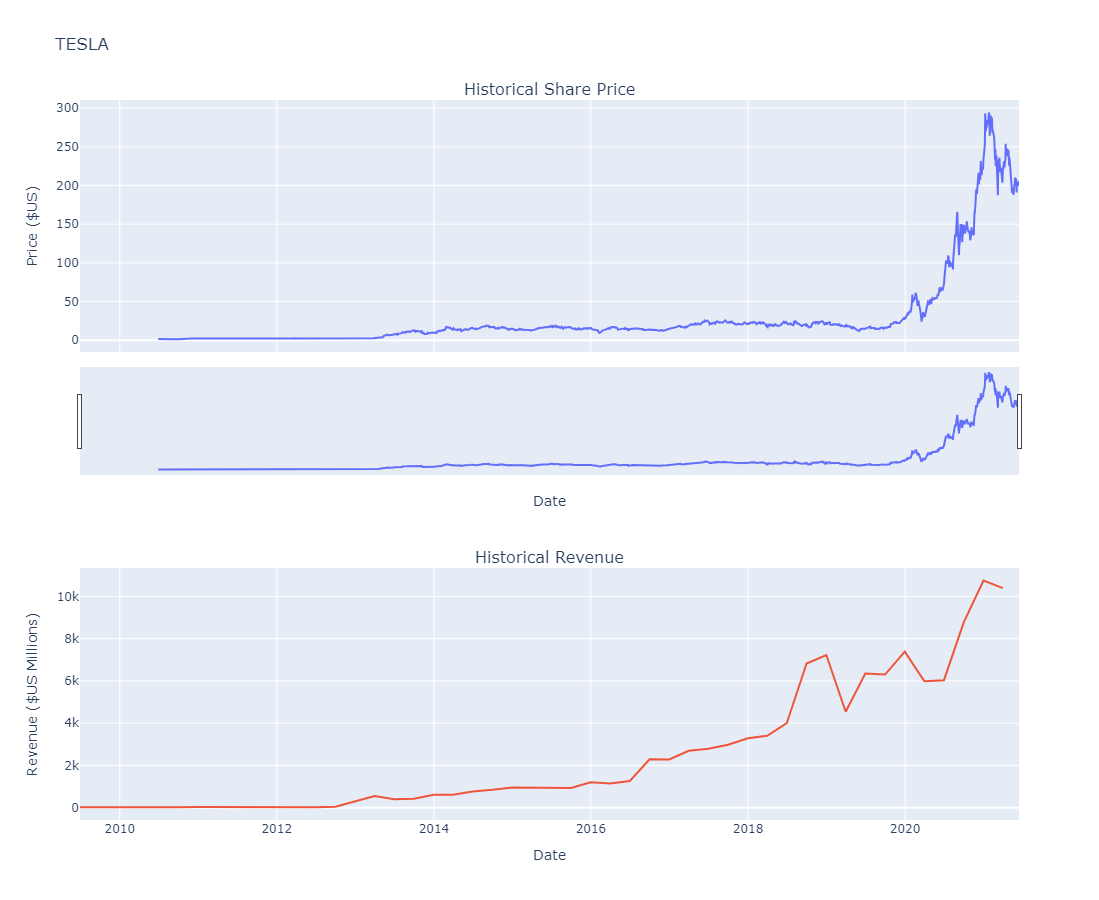

In [124]:
# Call the function to plot Tesla data
make_graph(tesla_data, tesla_revenue, 'TESLA')

C:\Users\Moham\AppData\Local\Temp\ipykernel_8356\1202173309.py:13: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Moham\AppData\Local\Temp\ipykernel_8356\1202173309.py:18: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



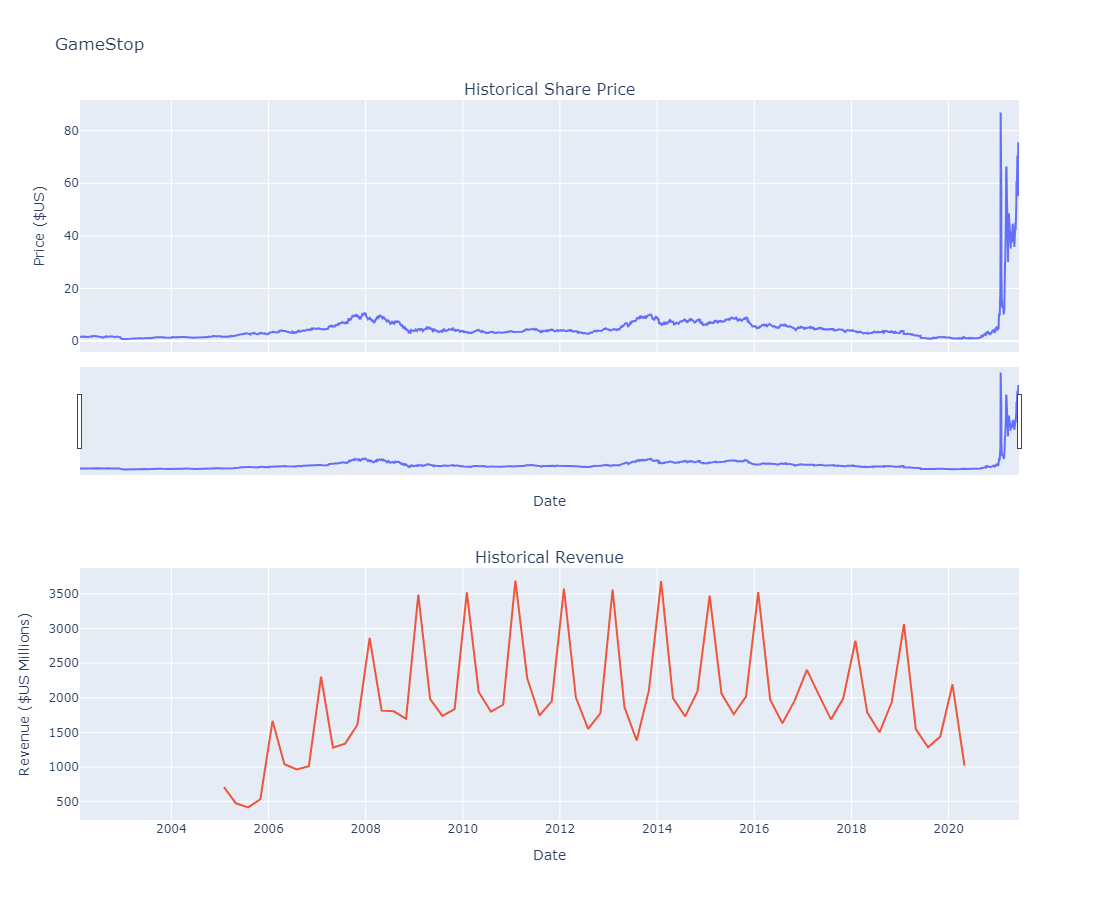

In [127]:
# Call the function to plot GameStop data
make_graph(gme_data, gme_revenue, 'GameStop')

# Conclusion
In this analysis, we visualized the historical stock prices and revenue data for Tesla and GameStop. Observations from the visualizations can provide insights into how external factors and market trends may have affected these companies' financial performance over time.